In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv('pre_processed_data.csv')

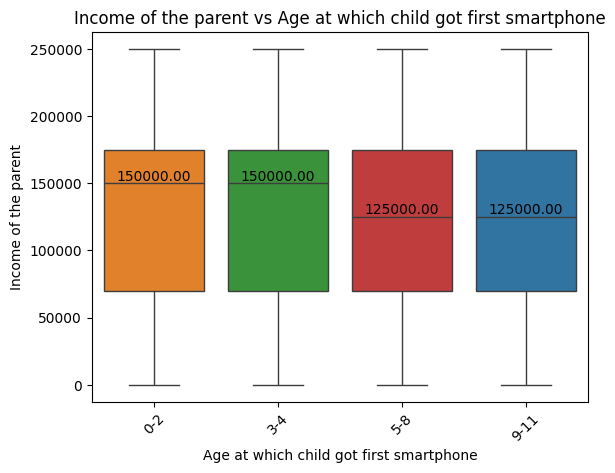

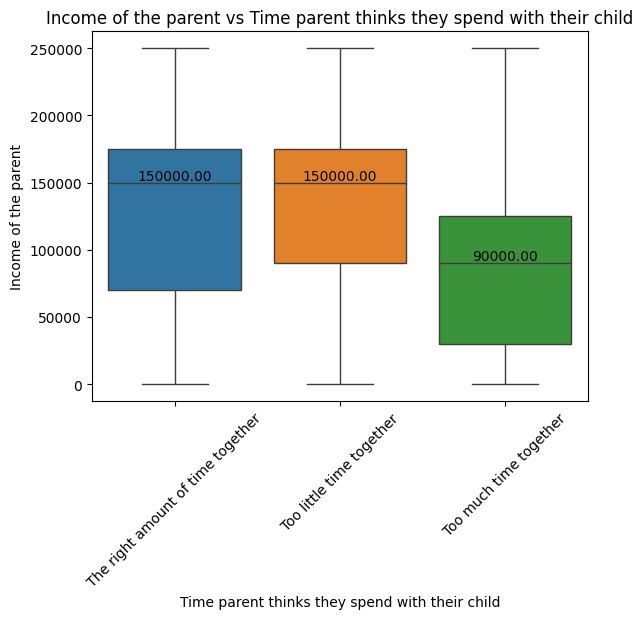

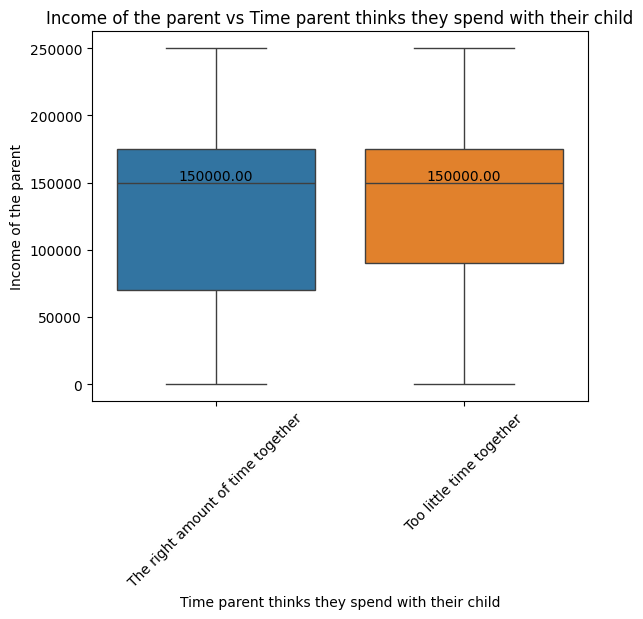

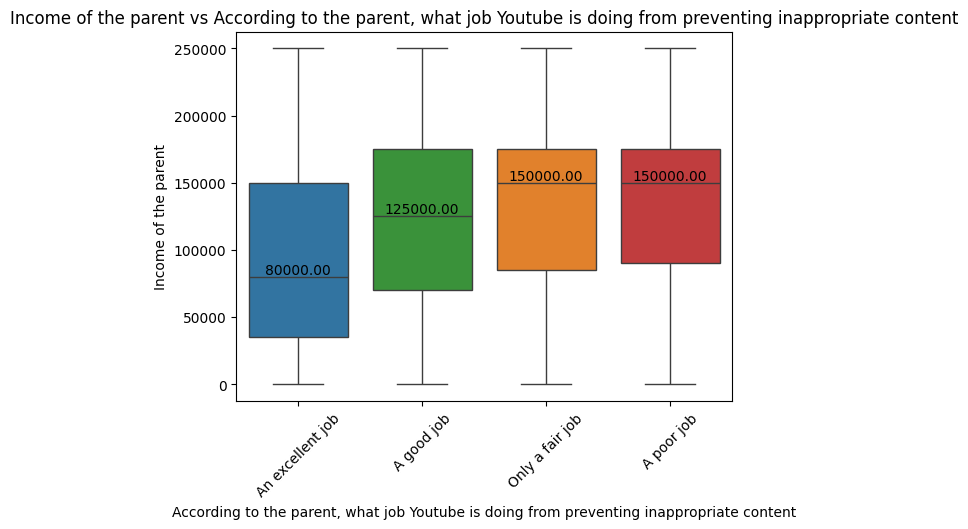

In [3]:
def plot_boxplot(data, column1, column2, column1_name, column2_name):
    '''
    Plots a boxplot for column1 and column2
    
    args- 
    data: Dataframe containing the whole data
    column1: Column name of the y-axis
    column2: Column name of the x-axis
    column1_name: Label for y-axis
    column2_name: Label for x-axis
    returns - 
    None
    Displays a boxplot
    '''
    filtered_df = data[(data[column1] != 'Refused') & (data[column2] != 'Refused')]
    filtered_df = filtered_df[~filtered_df[column2].isnull()]
    sorted_values = filtered_df[column2].sort_values().unique()

    if column2 == 'YT_preventing_inappropriate':
        sorted_values = [
            "An excellent job",
            "A good job",
            "Only a fair job",
            "A poor job"
        ]

    sns.boxplot(y=column1, x=column2, data=filtered_df, hue=column2, legend=False, order=sorted_values)
    for i, box in enumerate(sorted_values):
        vals = filtered_df[filtered_df[column2] == box][column1]
        median_val = vals.median()
        plt.text(i, median_val, f'{median_val:.2f}', ha='center', va='bottom', fontdict={'fontsize': 10})
    plt.ylabel(column1_name)
    plt.xlabel(column2_name)
    plt.xticks(rotation=45)
    plt.title(f'{column1_name} vs {column2_name}')
    plt.savefig(f'{column1_name}_vs_{column2_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_boxplot(data, 'P_income', 'Child_first_age_smartphone','Income of the parent','Age at which child got first smartphone')
plot_boxplot(data, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
filtered_df = data[(data['P_income'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Refused') & (data['As_a_parent_your_job_is'] != 'Too much time together')]
plot_boxplot(filtered_df, 'P_income', 'As_a_parent_your_job_is','Income of the parent','Time parent thinks they spend with their child')
plot_boxplot(data, 'P_income', 'YT_preventing_inappropriate','Income of the parent','According to the parent, what job Youtube is doing from preventing inappropriate content')
    

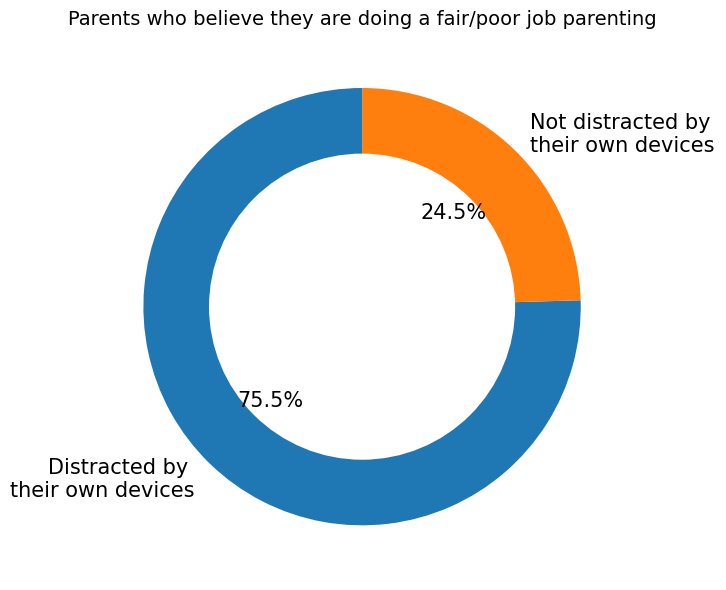

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_job_performance_and_distraction(data):
    """
    Plot the counts of parental job performance and distraction frequency.

    args -:
    data: DataFrame containing columns 'How_often_distracted' and 'Time_spent_together'

    Returns:
    (none)
    displays the plot
    """

    condition_total_fair_poor = data[data['Time_spent_together'].isin(['Only a fair job', 'A poor job'])]
    condition_distracted_fair_poor = condition_total_fair_poor[condition_total_fair_poor['How_often_distracted'].isin(['Often', 'Sometimes'])]

    count_total_fair_poor = condition_total_fair_poor.shape[0]
    count_distracted_fair_poor = condition_distracted_fair_poor.shape[0]

    # Data for pie chart
    sizes = [count_distracted_fair_poor, count_total_fair_poor - count_distracted_fair_poor]
    labels = ['Distracted by \ntheir own devices', 'Not distracted by \ntheir own devices']

    # Plotting pie chart as a donut chart
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90)

    # Draw a circle at the center of pie to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)

    # Increase the font size of the title and labels
    plt.title('Parents who believe they are doing a fair/poor job parenting', fontsize=14)

    for text in texts:
        text.set_fontsize(15)
    for autotext in autotexts:
        autotext.set_fontsize(15)

    plt.tight_layout()
    plt.show()


plot_job_performance_and_distraction(data)